# __SCALING__

<hr>
<hr>

- the main purpose is to make easier calculation.
- to make comparison between features with different measurements easy. example: height and weight
- to make comparison between features with high value range easy
- to change data distribution

- scaling is optional
- when we use standardization: features have different measurement and high value difference

- standardized data has mean ~ (come near to) 1 and std ~ 0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

### A. _Standardization_

- range average between the data point and mean in std.

- $\displaystyle z_{score} = \frac {x - \bar{x}} {s}$ dimana $\displaystyle s = \sqrt {\frac {\sum (x - \bar{x}) ^2} {n - \textrm{ddof}}}$

- ```ddof``` degree of freedom. in pandas = 1. in numpy = 0. in sklearn = 0

- High outlier if $z_{score} > 2$ or $z_{score} > 2.5$
- Low outlier if $z_{score} < -2$ or $z_{score} < -2.5$

In [3]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df

,TB,BB
0,1.72,76
1,1.81,65
2,1.93,87
3,1.67,55
4,1.85,60
5,1.66,78
6,1.59,98
7,1.76,77
8,1.88,74
9,1.78,64


In [4]:
TBmean = df['TB'].mean()
TBstd1 = df['TB'].std() # pandas ddof = 1
TBstd2 = np.std(df['TB']) # numpy ddof = 0
TBmean, TBstd1, TBstd2

(1.765, 0.10679679562400528, 0.10131633629380801)

In [5]:
BBmean = df['BB'].mean()
BBstd1 = df['BB'].std()
BBstd2 = np.std(df['BB'])
BBmean, BBstd1, BBstd2

(73.4, 12.946041866145807, 12.281693694275232)

In [7]:
df['TB z-score'] = (df['TB'] - df['TB'].mean()) / np.std(df['TB'])
df['BB z-score'] = (df['BB'] - df['BB'].mean()) / np.std(df['BB'])
df

,TB,BB,TB z-score,BB z-score
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055
5,1.66,78,-1.036358,0.374541
6,1.59,98,-1.727263,2.002981
7,1.76,77,-0.049350,0.293119
8,1.88,74,1.135059,0.048853
9,1.78,64,0.148051,-0.765367


In [8]:
# standardized data: mean ~ 0 and std ~ 1
print(df['TB z-score'].mean(), np.std(df['TB z-score']))
print(df['BB z-score'].mean(), np.std(df['BB z-score']))

8.854028621385623e-16 1.0
-4.440892098500626e-16 1.0


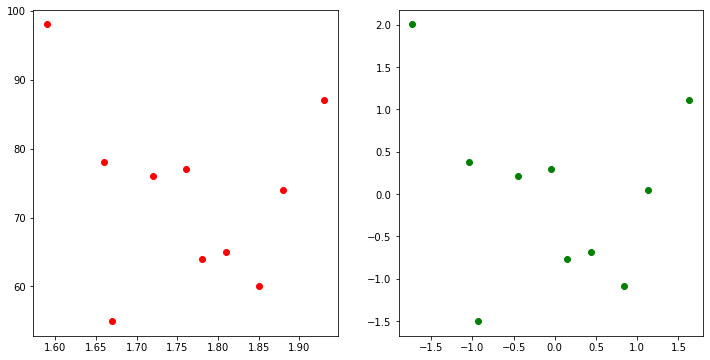

In [10]:
# 
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(df['TB'], df['BB'], 'ro')
plt.subplot(122)
plt.plot(df['TB z-score'], df['BB z-score'], 'go')
plt.show()

In [11]:
# return to original value

df['inverse TB z-score'] = (df['TB z-score'] * np.std(df['TB'])) + df['TB'].mean()
df['inverse BB z-score'] = (df['BB z-score'] * np.std(df['BB'])) + df['BB'].mean()
df

,TB,BB,TB z-score,BB z-score,inverse TB z-score,inverse BB z-score
0,1.72,76,-0.444153,0.211697,1.72,76.0
1,1.81,65,0.444153,-0.683945,1.81,65.0
2,1.93,87,1.628563,1.107339,1.93,87.0
3,1.67,55,-0.937657,-1.498165,1.67,55.0
4,1.85,60,0.838957,-1.091055,1.85,60.0
5,1.66,78,-1.036358,0.374541,1.66,78.0
6,1.59,98,-1.727263,2.002981,1.59,98.0
7,1.76,77,-0.049350,0.293119,1.76,77.0
8,1.88,74,1.135059,0.048853,1.88,74.0
9,1.78,64,0.148051,-0.765367,1.78,64.0


<hr>

### B. _Standardization on Sklearn_

#### B1. _```preprocessing.scale()```_

```from sklearn import preprocessing```

In [12]:
from sklearn import preprocessing

In [ ]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})
df

In [15]:
zTB = preprocessing.scale(df['TB'])
zBB = preprocessing.scale(df['BB'])
df['TB z-score'] = zTB
df['BB z-score'] = zBB
df

,TB,BB,TB z-score,BB z-score
0,1.72,76,-0.444153,0.211697
1,1.81,65,0.444153,-0.683945
2,1.93,87,1.628563,1.107339
3,1.67,55,-0.937657,-1.498165
4,1.85,60,0.838957,-1.091055
5,1.66,78,-1.036358,0.374541
6,1.59,98,-1.727263,2.002981
7,1.76,77,-0.049350,0.293119
8,1.88,74,1.135059,0.048853
9,1.78,64,0.148051,-0.765367


#### B2. _```preprocessing.StandardScaler()```_

``` from sklearn.preprocessing import StandardScaler```

In [3]:
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.DataFrame({
    'TB': [1.72, 1.81, 1.93, 1.67, 1.85, 1.66, 1.59, 1.76, 1.88, 1.78],
    'BB': [76, 65, 87, 55, 60, 78, 98, 77, 74, 64]
})

In [17]:
scaler = StandardScaler()

In [19]:
#create scaler
scaler.fit(df[['TB', 'BB']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# transformation: do the standardization
z = scaler.transform(df[['TB', 'BB']])
z

In [ ]:
df['TB z-score'] = z[:, 0]
df['BB z-score'] = z[:, 1]
df

#### inverse transform: return to original value

$\displaystyle x = (z_{score} \cdot s) + \bar{x}$

In [23]:
# inverse transform: the features you want to inverse must be same with the features that you fitted before

inv = scaler.inverse_transform(df[['TB z-score', 'BB z-score']])

In [ ]:
df['inverse TB z-score'] = inv[:,0]
df['inverse BB z-score'] = inv[:,1]
df

## CONTOH CASE

#### cara ke-1: without standardization

In [6]:
lol = pd.DataFrame({
    'mesin': [1000, 2000, 3000, 4000, 5000],
    'harga': [10, 25, 35, 55, 80]
})
lol
# gap mesin and harga is way too big. 

,mesin,harga
0,1000,10
1,2000,25
2,3000,35
3,4000,55
4,5000,80


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(lol[['mesin']], lol['harga'])

In [30]:
lol['harga pred'] = model.predict(lol[['mesin']])
lol

,mesin,harga,harga pred
0,1000,10,7.0
1,2000,25,24.0
2,3000,35,41.0
3,4000,55,58.0
4,5000,80,75.0


#### cara ke-2 : standardization X and Y
##### not effective because the result is z-score prediction
##### better standardization X features only
##### knp scaler dipisah krn si scalerX untuk standarisasi khusus fitur X dan begitu juga Y

In [7]:
scalerX = StandardScaler()
scalerY = StandardScaler()

In [8]:
lol['mesin z-score'] = scalerX.fit_transform(lol[['mesin']])
lol['harga z-score'] = scalerY.fit_transform(lol[['harga']])
lol

,mesin,harga,mesin z-score,harga z-score
0,1000,10,-1.414214,-1.271945
1,2000,25,-0.707107,-0.656488
2,3000,35,0.000000,-0.246183
3,4000,55,0.707107,0.574427
4,5000,80,1.414214,1.600189


In [11]:
model2 = LinearRegression()
model2.fit(lol[['mesin z-score']], lol['harga z-score'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lol['harga z-score pred'] = model2.predict(lol[['mesin z-score']])
lol

,mesin,harga,mesin z-score,harga z-score,harga z-score pred
0,1000,10,-1.414214,-1.271945,-1.395037e+00
1,2000,25,-0.707107,-0.656488,-6.975184e-01
2,3000,35,0.000000,-0.246183,-4.440892e-17
3,4000,55,0.707107,0.574427,6.975184e-01
4,5000,80,1.414214,1.600189,1.395037e+00


In [13]:
# predict harga untuk mesin 6000 dgn model kedua

scalerY.inverse_transform(
    model2.predict(
        scalerX.transform([[6000]])))[0]

91.99999999999997

#### Cara ke-3 Standardized X Feature only

In [ ]:
lol = pd.DataFrame({
    'mesin': [1000, 2000, 3000, 4000, 5000],
    'harga': [10, 25, 35, 55, 80]
})
lol


In [63]:
scaler = StandardScaler()
lol['mesin z-score'] = scaler.fit_transform(lol[['mesin']])

In [ ]:
model = LinearRegression()

#training with standardized X, original Y
model.fit(lol[['mesin z-score']], lol['harga'])

In [65]:
lol['harga pred'] = model.predict(lol[['mesin z-score']])
lol

,mesin,harga,mesin z-score,harga pred
0,1000,10,-1.414214,7.0
1,2000,25,-0.707107,24.0
2,3000,35,0.000000,41.0
3,4000,55,0.707107,58.0
4,5000,80,1.414214,75.0


In [67]:
# predict harga dengan mesin 6000
model.predict(scaler.transform([[6000]]))[0]

92.0

 exercise : https://www.kaggle.com/harlfoxem/housesalesprediction
